##  Baseball Case Study
##### 
Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

### Input features-

1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding e8.	receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as  result.
rror.
its as a result.


- Output: Number of predicted wins (W)

# Importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset 

In [3]:
df = pd.read_csv('baseball.csv') 

In [4]:
df.head(3) # top three records of data set 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


# Basic information about the dataset

In [5]:
df.shape # Records of data set 

(30, 17)

In [6]:
df.columns  # Columns names 

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.info() # information about data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Checking Null value in Dataset 

In [8]:
df.isnull().sum()  # cheking null values in dataset 

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

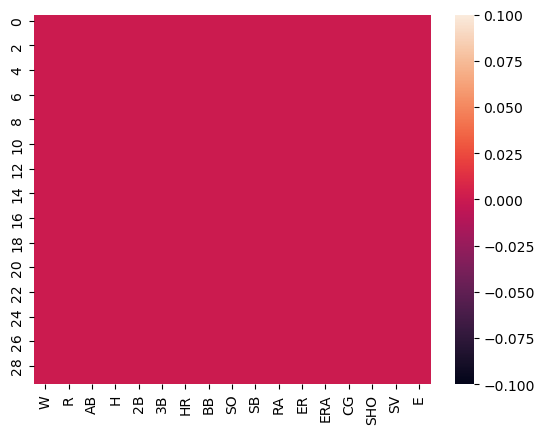

In [9]:
sns.heatmap(df.isnull())  # cheking null values in dataset by heatmap 

# Statistical summary of Dataset

In [10]:
df.describe().T # statistical summary of dataset 

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [11]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Data Visualization 

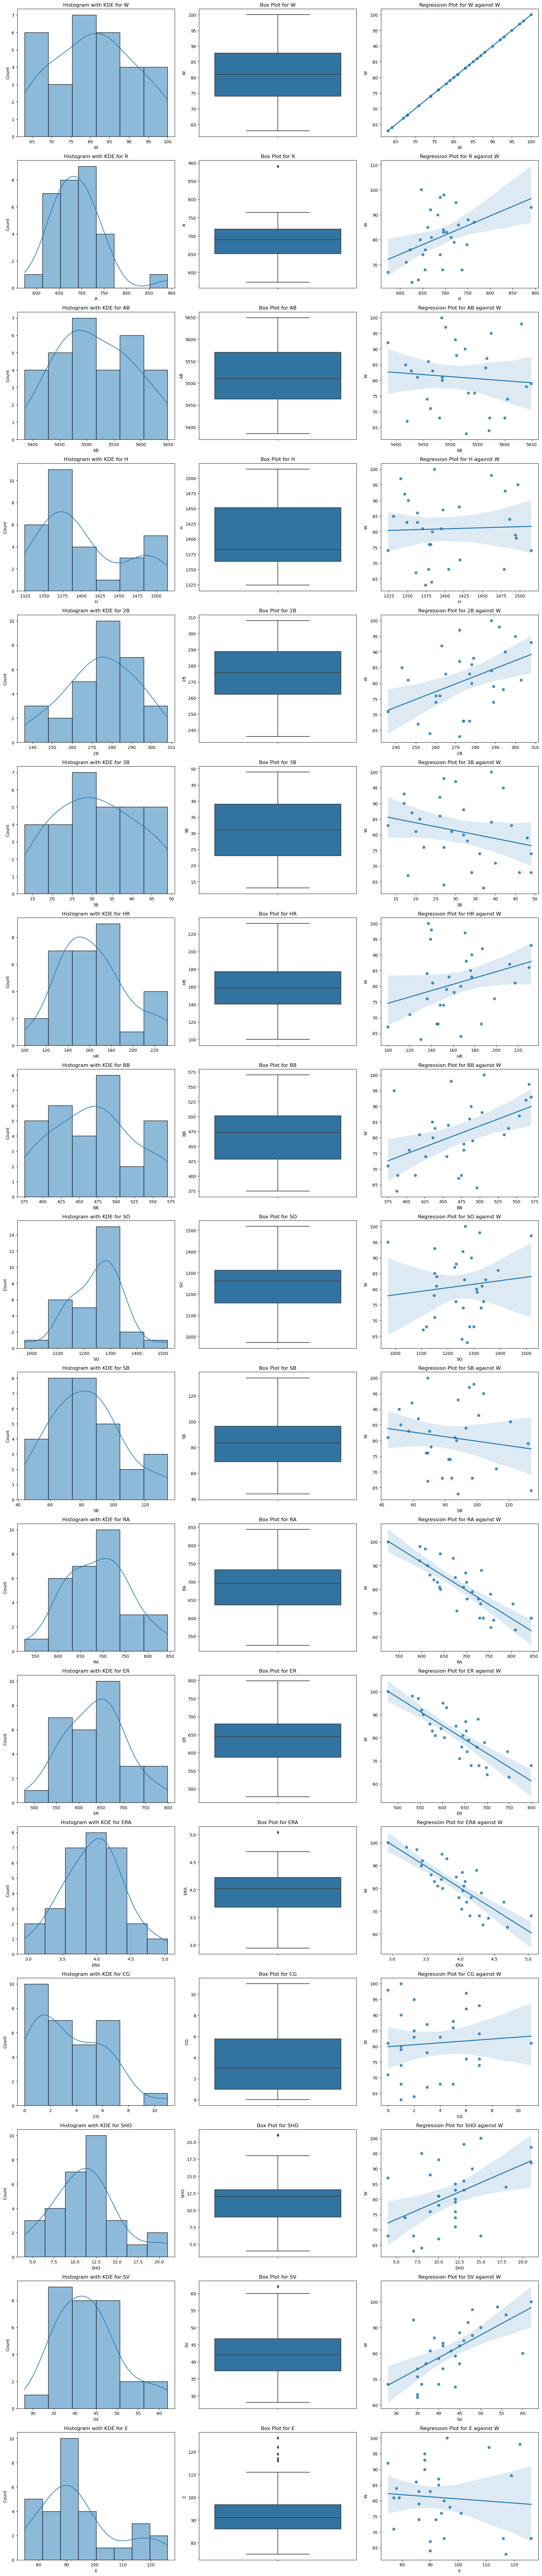

In [12]:
columns = df.columns  # number of colums in data set assign 

rows = len(columns) # lenght of columns 
cols = 3    # three cols figure 

# Subplot 

fig, axes = plt.subplots (rows, cols, figsize=(18, 5*rows))

# flatten the axes array to make it easier to access

axes = axes.flatten()

# loop though each columns

for i , column in enumerate(columns):

    # Histogram 
    sns.histplot(x=df[column], kde=True, ax=axes[i*cols])
    axes[i*cols].set_title(f'Histogram with KDE for {column}')

    # Box Plot 
    sns.boxplot(y=df[column],ax=axes[i*cols+1])
    axes[i*cols+1].set_title(f'Box Plot for {column}')


    # Regression Plot 
    sns.regplot(x=column,y='W', data=df, ax=axes[i*cols+2])
    axes[i*cols+2].set_title(f'Regression Plot for {column} against W')

# Adjust layout 

plt.tight_layout()
plt.show()

## Obervations
- Run and win are linearly correlated. And outliers are present between 850 and 900
- At balls is very weekly related to Wins With no outliers.
- Hits are also very weekly related to winning with no outliers
- Doubles are linearly related with Wins, with no outlier, and data is left-skewed
- Triple has very weak negative correlations with win with no outlier and data is right-skewed
- The home run has a very low correlation with wins with no lot of outliers and data is right-skewed
- Walk is lightly correlated to win with no outlier
- Strikeout is not correlated to win with no outlier and the dataset is left-skewed.
- Stolen Bases is not correlated to win with no outlier
- Runs Allowed is highly correlated to win with no outliers
- Earned Runs is highly correlated to win with no outliers
- Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.
- Shutouts are highly correlated to win with no outliers and data is right-skewed.
- Saves are lightly correlated to win with no outliers-skewed.

# Pearson r correlation: 
- Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables

<Axes: >

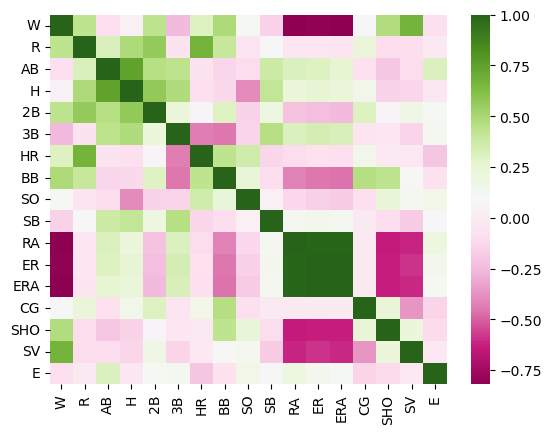

In [13]:
sns.heatmap(df.corr(),cmap='PiYG')

- From statistics it is found that all columns and target features have too much larger differences so we need to scaled the data set.

## Standardization :
- It is a method to convert the data set into a normal distribution.
- Log-transformation — if the data set is highly rightly skewed then it is best to use Log-transformation.
- Square root transformation — if data is a little bit right-skewed then it is best to use square root transform
- Box-cox transformation
- Power transformation
## Normalization:
- It is a mathematical technique that scales the data into some range it is required for some machine learning algorithms  such as Linear regression
- Normalization minimizes the difference between the low valve and high value which helps in better prediction
- Min-Max-Scaler- it converter the dataset into the range of 0 to 1
- Mean Normalization- it converts the data set into the range of -1 ti 1 and the mean is 0
- Standard scaling(z-score)- its converts data set as mean=0, standard deviation as 1n-  as 1

# Min-Max Scaling 

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(df)

In [15]:
# convert X_scaled to a DataFrame 
X_scaled_df = pd.DataFrame(X_scaled,columns=df.columns)

In [16]:
X_scaled_df.head() # checking record coversion done or not 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.864865,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.540541,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.486486,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.351351,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.297297,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686


In [17]:
# Collecting the scaled data into data frame
df = X_scaled_df

In [18]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.864865,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.540541,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.486486,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.351351,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.297297,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686


In [19]:
df.describe().T   # then again checked statistical summary and hence all record are converted into same scale or same unit 

,count,mean,std,min,25%,50%,75%,max
W,30.0,0.485586,0.282526,0.0,0.297297,0.486486,0.668919,1.0
R,30.0,0.362369,0.184785,0.0,0.246069,0.364780,0.456761,1.0
AB,30.0,0.497222,0.266922,0.0,0.299242,0.473485,0.700758,1.0
H,30.0,0.416405,0.299167,0.0,0.204188,0.306283,0.667539,1.0
2B,30.0,0.537963,0.251325,0.0,0.364583,0.548611,0.732639,1.0
3B,30.0,0.508333,0.290343,0.0,0.277778,0.500000,0.722222,1.0
HR,30.0,0.482071,0.241086,0.0,0.304924,0.443182,0.583333,1.0
BB,30.0,0.482564,0.292583,0.0,0.273077,0.502564,0.647436,1.0
SO,30.0,0.504954,0.190384,0.0,0.338532,0.529358,0.621101,1.0
SB,30.0,0.438889,0.253502,0.0,0.277778,0.438889,0.583333,1.0


# Sepration of Features & Splitting Dataset 

In [20]:
feature = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']  # independent variable sepration 
label   = ['W'] # target variable sepration done 

X = df[feature]      # assing to X varible 
y = df[label]        # target assing to Y varible 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # spliting the data set into training and testing 

# Model LinearRegression 

In [22]:
# Import model 
from sklearn.linear_model import LinearRegression

# make instance 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# checking training score 
print("Training  Score:",model.score(X_train, y_train))

Training  Score: 0.9821059744417345


In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print("Testing Score :",r2_score(y_test,y_pred))

Testing Score : 0.7692581763754468


In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022697759129369242


# Polynomial Regression 

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize PolynomialFeatures with the degree of polynomial you want

poly_features = PolynomialFeatures(degree=1)  # You can adjust the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Print the training score
print("Training Score:", model.score(X_train_poly, y_train))

Training Score: 0.9740426384448531


In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate and print the testing score
testing_score = r2_score(y_test, y_pred)
print("Testing Score:", testing_score)

Testing Score: 0.7876400316149398


In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.020411272831751284


# Ridge Model 

In [28]:
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
ridge_reg = Ridge(alpha=0.01)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = ridge_reg.predict(X_train)

# Calculate R-squared score for training set
train_r2 = r2_score(y_train, y_train_pred)
print("Training R-squared:", train_r2)

# Make predictions on the test set
y_test_pred = ridge_reg.predict(X_test)

# Calculate R-squared score for test set
test_r2 = r2_score(y_test, y_test_pred)
print("Testing R-squared:", test_r2)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.9684066988994817
Testing R-squared: 0.7535860602382857
Mean Squared Error: 0.0236844175117937


# Lasso Model 

In [29]:
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Lasso Regression model
lasso_reg = Lasso(alpha=0.000001)  # You can adjust the alpha parameter for regularization strength
lasso_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lasso_reg.predict(X_train)

# Calculate R-squared score for training set
train_r2 = r2_score(y_train, y_train_pred)
print("Training R-squared:", train_r2)

# Make predictions on the test set
y_test_pred = lasso_reg.predict(X_test)

# Calculate R-squared score for test set
test_r2 = r2_score(y_test, y_test_pred)
print("Testing R-squared:", test_r2)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.9731545828013664
Testing R-squared: 0.773437731499399
Mean Squared Error: 0.02177634660107432


# Elastic Net 

In [30]:
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Elastic Net Regression model
elastic_net_reg = ElasticNet(alpha=0.01, l1_ratio=0.02)  
# You can adjust alpha and l1_ratio parameters for regularization strength and L1/L2 ratio
elastic_net_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = elastic_net_reg.predict(X_train)

# Calculate R-squared score for training set
train_r2 = r2_score(y_train, y_train_pred)
print("Training R-squared:", train_r2)

# Make predictions on the test set
y_test_pred = elastic_net_reg.predict(X_test)

# Calculate R-squared score for test set
test_r2 = r2_score(y_test, y_test_pred)
print("Testing R-squared:", test_r2)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

Training R-squared: 0.9337582454598836
Testing R-squared: 0.7285861260319653
Mean Squared Error: 0.02608732085436613


# SVM Regressor 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Initialize and train the Support Vector Machine Regressor
svm_regressor = SVR(kernel='linear')  # You can also use other kernels like 'rbf'
svm_regressor.fit(X_train, y_train)

# Training score
train_score = svm_regressor.score(X_train, y_train)
print("Training Score:", train_score)

# Testing score
test_score = svm_regressor.score(X_test, y_test)
print("Testing Score:", test_score)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training Score: 0.9158370658035144
Testing Score: 0.7908449358555152
Mean Squared Error: 0.020103229016565704


# Random Forest Regressor 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)  # You can adjust the number of estimators
rf_regressor.fit(X_train, y_train)

# Training score
train_score = rf_regressor.score(X_train, y_train)
print("Training Score:", train_score)

# Testing score
test_score = rf_regressor.score(X_test, y_test)
print("Testing Score:", test_score)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training Score: 0.9230181744352303
Testing Score: 0.5762010183660559
Mean Squared Error: 0.040734026783540156


# xgboost Model 

In [33]:
!pip install xgboost

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42,learning_rate=0.5,max_depth=2)  
# You can adjust other hyperparameters like learning rate, max_depth, etc.

xg_reg.fit(X_train, y_train)

# Training score
train_score = xg_reg.score(X_train, y_train)
print("Training Score:", train_score)

# Testing score
test_score = xg_reg.score(X_test, y_test)
print("Testing Score:", test_score)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training Score: 0.9999932642986582
Testing Score: 0.6958350411955763
Mean Squared Error: 0.029235236787934323


# Cross Validation 

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

# Initialize an ElasticNet regression model
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.02) 

# Perform k-fold cross-validation (e.g., with k=5)
k = 4
cv_scores = cross_val_score(elastic_net_reg, X, y, cv=k, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
avg_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", avg_cv_score)

Cross-Validation Scores: [0.0432192  0.05283934 0.1134661  0.09571331]
Average Cross-Validation Score: 0.07630948624750869


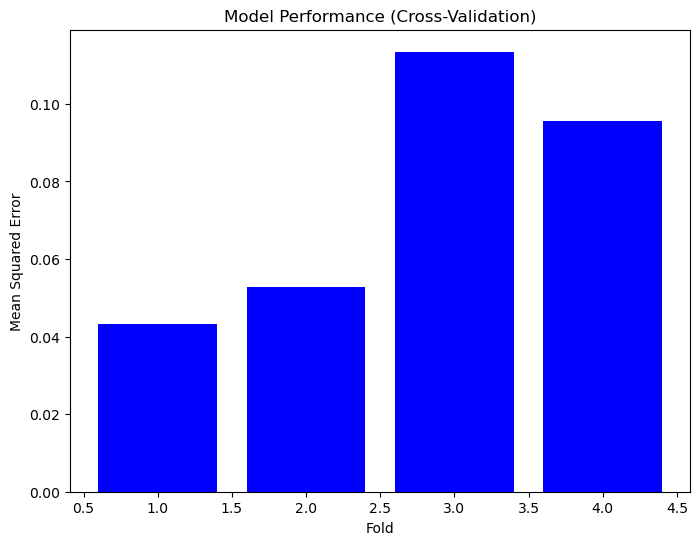

In [36]:
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, k + 1), cv_scores, color='blue')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance (Cross-Validation)')
plt.show()

# Best Model Final predictions 

In [37]:
new_data = np.array([[0.474, 0.719, 0.905, 0.888, 0.805, 0.295, 0.041, 0.000, 0.666, 0.363,
                      0.383, 0.376, 0.181, 0.235, 0.8235, 0.2549]])  # Reshape into a single-row 2D array

# Initialize and train the Support Vector Machine Regressor
svm_regressor = SVR(kernel='linear')  # Choose the best-performing kernel
svm_regressor.fit(X_train, y_train)

# Make predictions on new data
predictions = svm_regressor.predict(new_data)
print("Predictions:", predictions)

Predictions: [0.79483104]
